In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

%matplotlib inline

In [ ]:
df_aapl = pd.read_csv('/content/AAPL.csv', index_col='Date', parse_dates=True)
df_vix = pd.read_csv('/content/^VIX.csv', index_col='Date', parse_dates=True)
df_vix.head()

Open       High    Low  Close  Adj Close  Volume
Date                                                             
2019-09-03  20.959999  21.150000  19.41  19.66      19.66       0
2019-09-04  18.230000  18.830000  17.26  17.33      17.33       0
2019-09-05  16.920000  17.049999  15.45  16.27      16.27       0
2019-09-06  15.920000  16.059999  14.91  15.00      15.00       0
2019-09-09  15.260000  16.129999  14.95  15.27      15.27       0

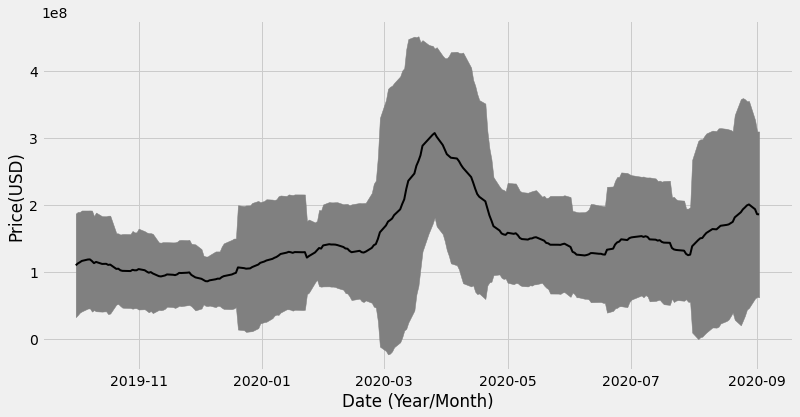

In [ ]:
sma = df_aapl['Volume'].rolling(window=21).mean()
symbol = 'AAPL'
# calculate the standar deviation
rstd = df_aapl['Volume'].rolling(window=21).std()

upper_band = sma + 2 * rstd
# upper_band = upper_band.rename(columns={symbol: 'upper'})

lower_band = sma - 2 * rstd
# lower_band = lower_band.rename(columns={symbol: 'lower'})
m_avg = sma

df_aapl['Upper'] = upper_band #throws an error here
df_aapl['Lower'] = lower_band
df_aapl['M avg'] = m_avg


col = 'Volume'
start = '2019'
end = '2020'

# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for the DataFrame
x_axis = df_aapl['2019':'2020'].index.get_level_values(0)

# Plot shaded 'win' Day Bollinger Band for Facebook
ax.fill_between(x_axis, 
                df_aapl[start:end]['Upper'], 
                df_aapl[start:end]['Lower'], 
                color='grey')

# ax.plot(x_axis, df_aapl[start:end][col], color='blue', lw=2)
ax.plot(x_axis, df_aapl[start:end]['M avg'], color='black', lw=2)

# Set Title & Show the Image

ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')

plt.show();




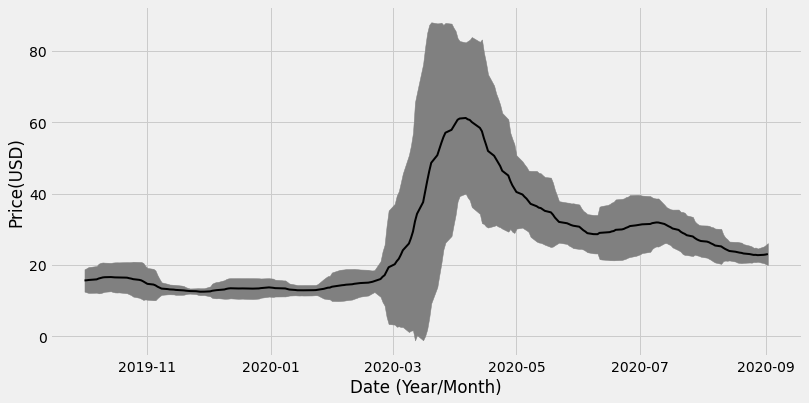

In [ ]:
sma = df_vix['Adj Close'].rolling(window=21).mean()
symbol = 'AAPL'
# calculate the standar deviation
rstd = df_vix['Adj Close'].rolling(window=21).std()

upper_band = sma + 2 * rstd
# upper_band = upper_band.rename(columns={symbol: 'upper'})

lower_band = sma - 2 * rstd
# lower_band = lower_band.rename(columns={symbol: 'lower'})
m_avg = sma

df_vix['Upper'] = upper_band #throws an error here
df_vix['Lower'] = lower_band
df_vix['M avg'] = m_avg


col = 'Close'
start = '2019'
end = '2020'

# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for the DataFrame
x_axis = df_vix['2019':'2020'].index.get_level_values(0)

# Plot shaded 'win' Day Bollinger Band for Facebook
ax.fill_between(x_axis, 
                df_vix[start:end]['Upper'], 
                df_vix[start:end]['Lower'], 
                color='grey')

# ax.plot(x_axis, df_vix[start:end][col], color='blue', lw=2)
ax.plot(x_axis, df_vix[start:end]['M avg'], color='black', lw=2)

# Set Title & Show the Image

ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')

plt.show();

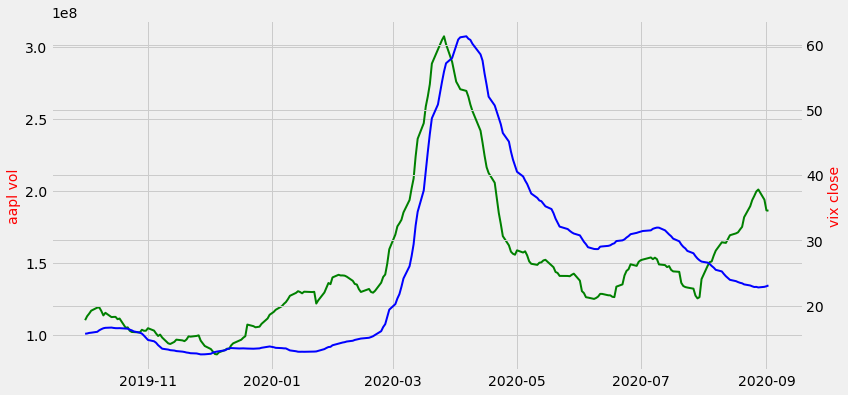

In [ ]:
sma1 = df_aapl['Volume'].rolling(window=21).mean()
sma2 = df_vix['Adj Close'].rolling(window=21).mean()

df_aapl['M avg'] = sma1
df_vix['M avg'] = sma2



plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.subplots(1)

# Get index values for the X axis for the DataFrame
x_axis1 = df_vix['2019':'2020'].index.get_level_values(0)
x_axis2 = df_aapl['2019':'2020'].index.get_level_values(0)

ax.set_ylabel("aapl vol",color="red",fontsize=14)
# ax.yscale('log')
ax2=ax.twinx()
ax2.set_ylabel("vix close",color="red",fontsize=14)
# ax.plot(x_axis, df_vix[start:end][col], color='blue', lw=2)
ax.plot(x_axis1, df_aapl[start:end]['M avg'], color='green', lw=2)
ax2.plot(x_axis2, df_vix[start:end]['M avg'], color='blue', lw=2)

